In [4]:
# load the libraries
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [5]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

In [6]:
# Mean vector and covariance matrix
mu = np.array([0.0, 0.0])
Sigma = np.array([[1.0, 0.7], [0.7, 1.0]])

In [7]:
# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

In [8]:
def set_axes_equal(ax):
    """Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

In [9]:
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos. pos is an array constructed
    by packing the meshed arrays of variables x_1, x_2, x_3, ..., x_k into its _last_ dimension.
    """
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2 * np.pi) ** n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum("...k,kl,...l->...", pos - mu, Sigma_inv, pos - mu)
    return np.exp(-fac / 2) / N

C:\Users\ajult\AppData\Local\Temp\ipykernel_31404\992629618.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(
C:\Users\ajult\AppData\Local\Temp\ipykernel_31404\992629618.py:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

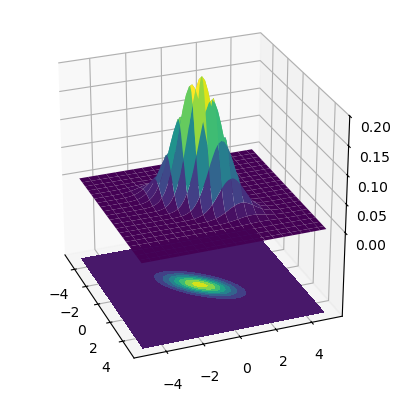

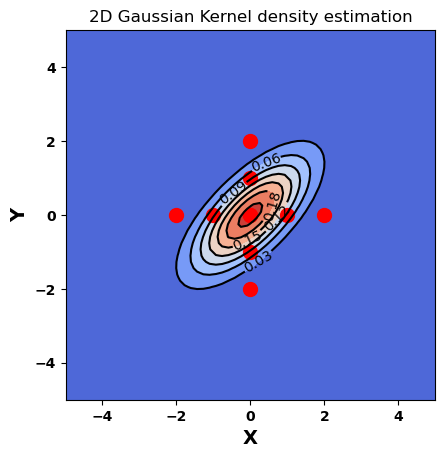

In [ ]:
# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)
# Create a surface plot and projected filled contour plot under it.
# fig = plt.figure(1, clear=True)

ax = plt.figure().add_subplot(projection="3d")

# ax.set_aspect("equal")
ax.plot_surface(
    X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis
)
ax.scatter3D(
    [-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, -2.0, 2.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 0.0, -2.0, 2.0],
    [-0.15],
    c="red",
    cmap="Reds",
    marker="o",
    s=100,
)
cset = ax.contourf(X, Y, Z, zdir="z", offset=-0.15, cmap=cm.viridis)
# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15, 0.2)
ax.set_zticks(np.linspace(0, 0.2, 5))
ax.view_init(27, -21)
# ax.set_xlim3d(-3, 3)
# ax.set_ylim3d(-3, 3)
# plt.show()
# fig = plt.clf()


fig2 = plt.figure(2, clear=True)
ax = fig2.gca()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
cfset = ax.contourf(X, Y, Z, cmap="coolwarm")
ax.imshow(np.rot90(Z), cmap="coolwarm", extent=[-5, 5, -5, 5])
ax.scatter(
    [-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, -2.0, 2.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 0.0, -2.0, 2.0],
    c="red",
    cmap="Reds",
    marker="o",
    s=100,
)
cset = ax.contour(X, Y, Z, colors="k")
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel("X", size=14, weight="bold")
plt.xticks(weight="bold")
ax.set_ylabel("Y", size=14, weight="bold")
plt.yticks(weight="bold")
plt.title("2D Gaussian Kernel density estimation")